In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Results from [measurements on a cluster](https://www.notion.so/fluencenetwork/IPC-Load-Testing-5ee3a43157aa402dae346da4002b86b4?pvs=4).

In [2]:
times = [
    {
        "batch_size": 32,
        "cus": 1,
        "cache_init": 450,
        "hash_calc": 200
    },
    {
        "batch_size": 32,
        "cus": 2,
        "cache_init": 500,
        "hash_calc": 200
    },
    {
        "batch_size": 32,
        "cus": 4,
        "cache_init": 600,
        "hash_calc": 200
    },
    {
        "batch_size": 64,
        "cus": 2,
        "cache_init": 500,
        "hash_calc": 400
    },
    {
        "batch_size": 64,
        "cus": 4,
        "cache_init": 600,
        "hash_calc": 450
    },
    {
        "batch_size": 96,
        "cus": 2,
        "cache_init": 500,
        "hash_calc": 600
    },
    {
        "batch_size": 96,
        "cus": 4,
        "cache_init": 600,
        "hash_calc": 600
    },
    {
        "batch_size": 128,
        "cus": 2,
        "cache_init": 500,
        "hash_calc": 800
    },
    {
        "batch_size": 128,
        "cus": 4,
        "cache_init": 600,
        "hash_calc": 800
    },
]
batch_size = [t["batch_size"] for t in times]
cus = [t["cus"] for t in times if t["cus"] <= 8]
cache_init = [t["cache_init"] for t in times]
hash_calc = [t["hash_calc"] for t in times]

In [3]:
cache_init_time_p = np.polynomial.Polynomial.fit(cus, cache_init, deg=2, domain=[1, 8])
hash_calc_time_p = np.polynomial.Polynomial.fit(batch_size, hash_calc, deg=1, domain=[1, 256])

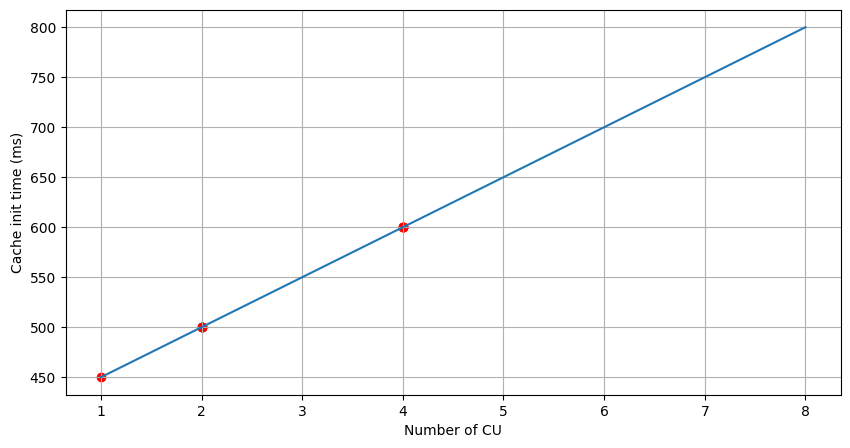

In [4]:
x, y = cache_init_time_p.linspace(64)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.scatter(cus, cache_init, color="red")
plt.xlabel("Number of CU")
plt.ylabel("Cache init time (ms)")
plt.grid(True)

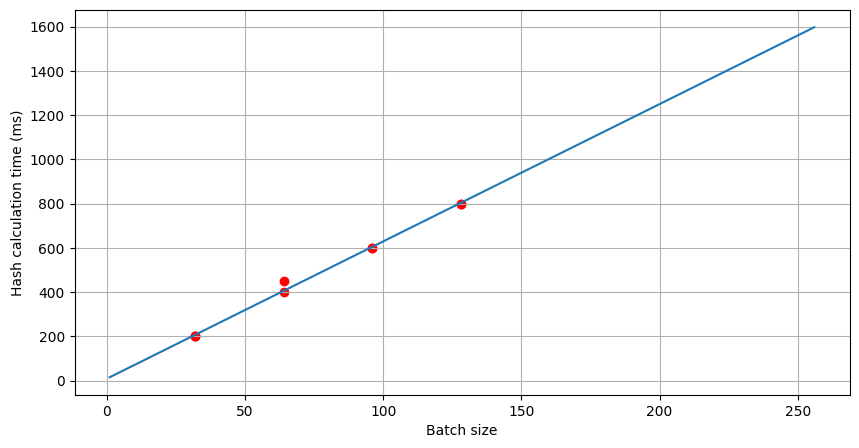

In [5]:
x, y = hash_calc_time_p.linspace(256)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.scatter(batch_size, hash_calc, color="red")
plt.xlabel("Batch size")
plt.ylabel("Hash calculation time (ms)")
plt.grid(True)

Define transaction time (in ms) for batch size `n` with `k` compute units in batch
as $t(n, k) = init\_time(k) + hash\_time(n)$. Then theoretical limit of PPS (proofs per second) is $\dfrac{n}{t(n, k)} \cdot 1000$.

In [6]:
def PPS(n, k):
    t = cache_init_time_p(k) + hash_calc_time_p(n)
    return 1000 * n / t

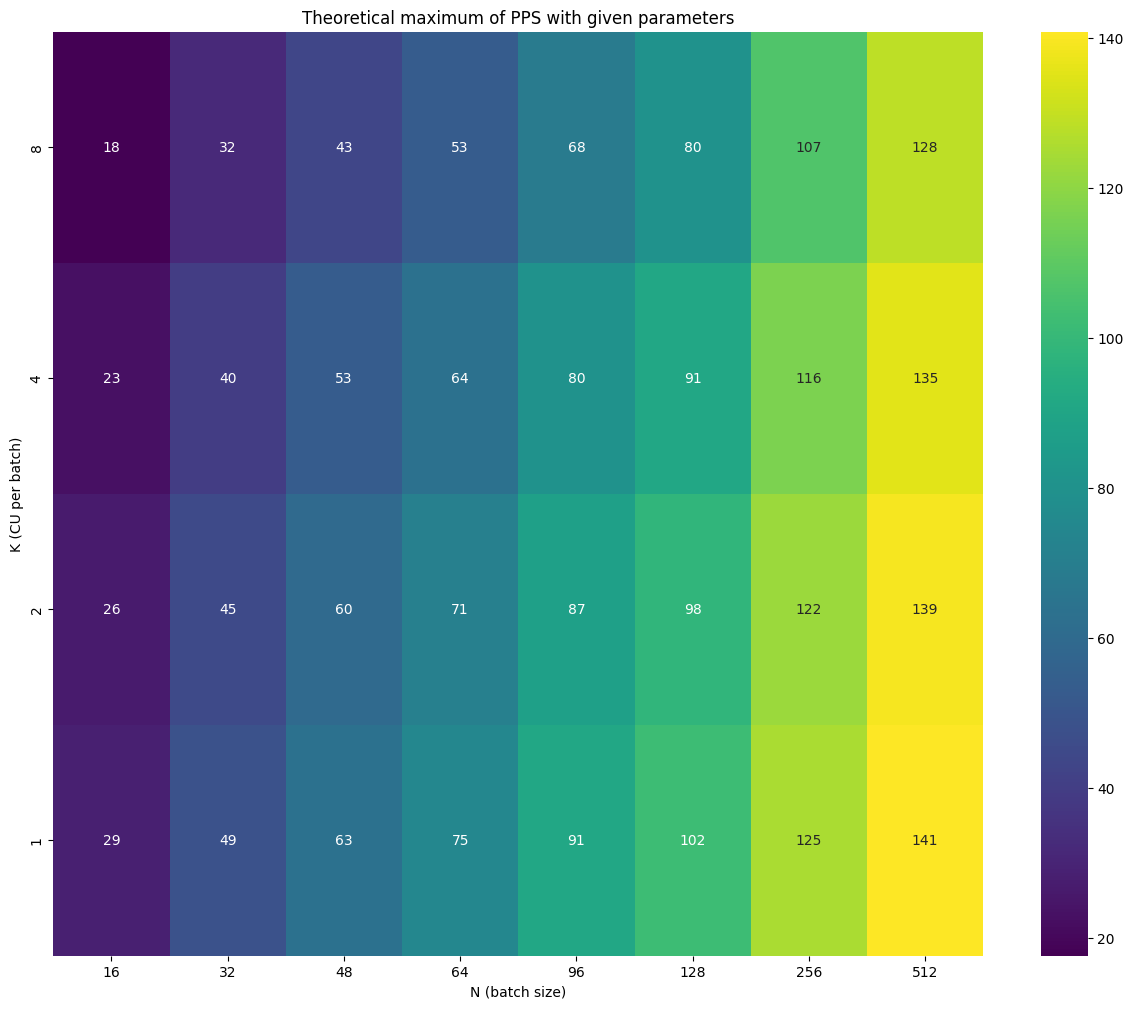

In [7]:
n = np.array([16, 32, 48, 64, 96, 128, 256, 512])
k = np.array([1, 2, 4, 8])
N, K = np.meshgrid(n, k)

P = PPS(N, K)
mask = N < K

plt.figure(figsize=(15, 12))
sns.heatmap(P[::-1], mask=mask[::-1], cmap='viridis', xticklabels=n, yticklabels=k[::-1], annot=True, fmt='.0f')
plt.xlabel('N (batch size)')
plt.ylabel('K (CU per batch)')
plt.title('Theoretical maximum of PPS with given parameters')
plt.show()

In [8]:
cache_init = pd.Series()
hash_calc = pd.Series()

In [9]:
cache_init.describe()

count       0
unique      0
top       NaN
freq      NaN
dtype: object

In [10]:
hash_calc.describe()

count       0
unique      0
top       NaN
freq      NaN
dtype: object